In [17]:
import os
import pandas as pd
import numpy as np
import gc

In [18]:
def load_data():
    df = pd.read_csv('music_genre.csv')
    return df

In [19]:
df = load_data()

In [20]:
df.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


In [21]:
#instance_id, artist_name, track_name, obtained_date

In [22]:
df = df.drop(['instance_id', 'artist_name', 'track_name', 'obtained_date'], axis = 1)

In [23]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder() 
df['mode'] = le.fit_transform(df['mode'])
df['key'] = le.fit_transform(df['key'])
df['music_genre'] = le.fit_transform(df['music_genre'])

In [24]:
df.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,27.0,0.00468,0.652,-1.0,0.941,0.79200,1,0.115,-5.201,1,0.0748,100.889,0.759,5
1,31.0,0.01270,0.622,218293.0,0.890,0.95000,5,0.124,-7.043,1,0.0300,115.00200000000001,0.531,5
2,28.0,0.00306,0.620,215613.0,0.755,0.01180,11,0.534,-4.617,0,0.0345,127.994,0.333,5
3,34.0,0.02540,0.774,166875.0,0.700,0.00253,4,0.157,-4.498,0,0.2390,128.014,0.270,5
4,32.0,0.00465,0.638,222369.0,0.587,0.90900,9,0.157,-6.266,0,0.0413,145.036,0.323,5


In [25]:
df.fillna(0, inplace=True)

In [26]:
df['tempo'] = np.where(df['tempo'] == '?', 0, df['tempo'])
df['duration_ms'] = np.where(df['duration_ms'] == -1.0, 0, df['duration_ms'])

In [27]:
df['tempo'] = np.where(df['tempo'] == 0, df['tempo'].median(), df['tempo'])
df['duration_ms'] = np.where(df['duration_ms'] == 0, df['duration_ms'].median(), df['duration_ms'])

In [28]:
df.isnull().sum()

popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
valence             0
music_genre         0
dtype: int64

In [33]:
data = df.iloc[:, :13]
labels = df.iloc[:, -1]

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.25, random_state=65)

In [35]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [36]:
from keras.utils import to_categorical

y_train_categorical = to_categorical(y_train, num_classes=11)
y_test_categorical = to_categorical(y_test, num_classes=11)

In [37]:
from keras import models
from keras import layers
from sklearn.metrics import classification_report, confusion_matrix

network = models.Sequential()
network.add(layers.Dense(128, activation='relu', input_shape=(13,)))
network.add(layers.Dropout(0.5))
network.add(layers.Dense(32, activation='relu'))
network.add(layers.Dropout(0.5))
network.add(layers.Dense(11, activation='softmax'))

In [38]:
network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [39]:
history = network.fit(X_train, y_train_categorical, epochs = 50, batch_size=128, validation_data=(X_test, y_test_categorical))

Epoch 1/50
293/293 [==============================] - 1s 3ms/step - loss: 1.9104 - accuracy: 0.2951 - val_loss: 1.4171 - val_accuracy: 0.4910
Epoch 2/50
293/293 [==============================] - 1s 2ms/step - loss: 1.5643 - accuracy: 0.4138 - val_loss: 1.3125 - val_accuracy: 0.5197
Epoch 3/50
293/293 [==============================] - 1s 2ms/step - loss: 1.4860 - accuracy: 0.4472 - val_loss: 1.2741 - val_accuracy: 0.5288
Epoch 4/50
293/293 [==============================] - 1s 2ms/step - loss: 1.4388 - accuracy: 0.4683 - val_loss: 1.2573 - val_accuracy: 0.5395
Epoch 5/50
293/293 [==============================] - 1s 2ms/step - loss: 1.4247 - accuracy: 0.4703 - val_loss: 1.2452 - val_accuracy: 0.5404
Epoch 6/50
293/293 [==============================] - 1s 2ms/step - loss: 1.4058 - accuracy: 0.4809 - val_loss: 1.2312 - val_accuracy: 0.5414
Epoch 7/50
293/293 [==============================] - 1s 2ms/step - loss: 1.3878 - accuracy: 0.4858 - val_loss: 1.2268 - val_accuracy: 0.5437
Epoch 

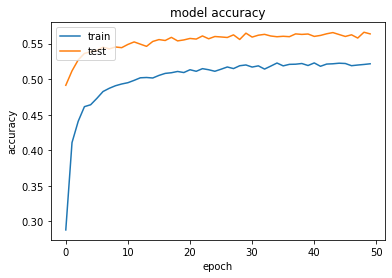

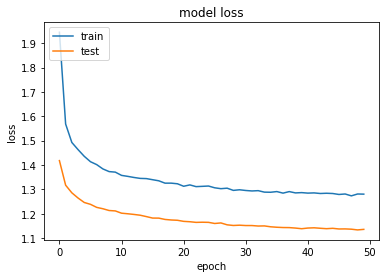

In [38]:
import matplotlib.pyplot as plt
def plot(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
plot(history)


In [24]:
# XG Boost

In [25]:
from sklearn.preprocessing import LabelEncoder 

lc = LabelEncoder() 
lc = lc.fit(y_train) 
lc_y = lc.transform(y_train)

lct = LabelEncoder() 
lct = lc.fit(y_test) 
lct_y = lc.transform(y_test)

In [43]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_validate,GridSearchCV

model = XGBClassifier(objective='multi:softmax')

model.fit(X_train, lc_y)

Fitting 10 folds for each of 32 candidates, totalling 320 fits


C:\Users\Acer\.conda\envs\ml\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(


KeyboardInterrupt: 

In [ ]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_xgboost = accuracy_score(lct_y, predictions)
print("Accuracy: %.2f%%" % (accuracy_xgboost * 100.0))

accuracy_xgboost2 = accuracy_score(lct_y, predictions2)
print("Accuracy2: %.2f%%" % (accuracy_xgboost2 * 100.0))
print(classification_report(y_test, predictions))


In [ ]:
# SVM

In [32]:
from sklearn import svm
from sklearn import metrics

clf = svm.SVC(kernel='poly') # Linear Kernel
clf.fit(X_train, y_train.ravel())
y_pred = clf.predict(X_test)

print("Accuracy:", metrics.accuracy_score(y_test.ravel(), y_pred))
print(classification_report(y_test, predictions))

Accuracy: 0.5543912973924172


In [33]:
# KNN

In [34]:
lc = LabelEncoder() 
lc = lc.fit(y_train) 
lc_y = lc.transform(y_train)

lct = LabelEncoder() 
lct = lc.fit(y_test) 
lct_y = lc.transform(y_test)

from sklearn.neighbors import KNeighborsClassifier

knn_clf=KNeighborsClassifier()
knn_clf.fit(X_train,np.ravel(lc_y))
ypred=knn_clf.predict(X_test) 
result2 = accuracy_score(np.ravel(lct_y),ypred)
print("Accuracy:",result2)
v
print(classification_report(y_test, predictions))

Accuracy: 0.47864341705327146


In [35]:
# Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

rfc = RandomForestClassifier(n_estimators=200, random_state = 42)
rfc.fit(X_train, y_train);
predictions = rfc.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.40      0.37      0.38      1205
           1       0.80      0.76      0.78      1275
           2       0.62      0.59      0.60      1241
           3       0.84      0.85      0.84      1253
           4       0.56      0.56      0.56      1232
           5       0.69      0.60      0.65      1311
           6       0.35      0.38      0.36      1249
           7       0.55      0.54      0.55      1258
           8       0.31      0.29      0.30      1239
           9       0.48      0.61      0.53      1238
          10       1.00      1.00      1.00         1

    accuracy                           0.56     12502
   macro avg       0.60      0.60      0.60     12502
weighted avg       0.56      0.56      0.56     12502



Wnioski:

Zbiór udało się nauczyć nienajlepiejej (najwyższe accuracy 58%)

Może to być spowodowane reakiem odpowiednich danych lub nieodpowiednim preprocessingiem

Sieć neuronowa dała najlepszy rezultat, jednak różnice nie są bardzo duże

